# NYC OpenData Presentation

---

## NYC Crash Analytics

Team:
Anthony Zeimbekakis, Benjamin Campman

# Understanding the Data

The dataset we are using is the `Motor Vehicle Collisions - Crash` table from NYC OpenData. It contains crash event information from all police reported motor vehicle collisions in NYC. The data has been filtered to contain only crashes reported for the calendar year 2021.

First, let's import the data using Python's `pandas`.

In [116]:
import pandas as pd

nyc_crash = pd.read_csv("../data/nyc_crash_2021.csv")
nyc_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110482 entries, 0 to 110481
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     110482 non-null  object 
 1   CRASH TIME                     110482 non-null  object 
 2   BOROUGH                        72174 non-null   object 
 3   ZIP CODE                       72160 non-null   float64
 4   LATITUDE                       101694 non-null  float64
 5   LONGITUDE                      101694 non-null  float64
 6   LOCATION                       101694 non-null  object 
 7   ON STREET NAME                 80710 non-null   object 
 8   CROSS STREET NAME              51017 non-null   object 
 9   OFF STREET NAME                29771 non-null   object 
 10  NUMBER OF PERSONS INJURED      110481 non-null  float64
 11  NUMBER OF PERSONS KILLED       110482 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED 

# What are the most common crash times in each borough?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

nyc_crash["hour"] = [x.split(":")[0] for x in nyc_crash["CRASH TIME"]]
nyc_crash["hour"] = [int(x) for x in nyc_crash["hour"]]

for borough in nyc_crash["BOROUGH"].unique():
    temp = nyc_crash.loc[nyc_crash["BOROUGH"] == borough]
    sns.histplot(x = 'hour', bins = 24, data = temp).set(title = borough)
    plt.show()


It appears that the most crashes happen around 3pm, and the least crashes around 3am.

In [4]:
num_injured = nyc_crash["NUMBER OF PEDESTRIANS INJURED"].sum()
num_injured += nyc_crash["NUMBER OF CYCLIST INJURED"].sum()
num_injured += nyc_crash["NUMBER OF MOTORIST INJURED"].sum()

print(f"Summation of number of pedestrians, cyclists, and motorists injured: {num_injured}")
print(f"Dataset number of persons injured: {nyc_crash['NUMBER OF PERSONS INJURED'].sum()}")
print(num_injured == nyc_crash["NUMBER OF PERSONS INJURED"].sum())

nyc_crash["num_injured"] = nyc_crash["NUMBER OF PEDESTRIANS INJURED"]
nyc_crash["num_injured"] += nyc_crash["NUMBER OF CYCLIST INJURED"]
nyc_crash["num_injured"] += nyc_crash["NUMBER OF MOTORIST INJURED"]
nyc_crash["num_injured"].sum

Summation of number of pedestrians, cyclists, and motorists injured: 49622
Dataset number of persons injured: 51752.0
False


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         0
1         1
2         0
3         1
4         1
         ..
110477    0
110478    0
110479    0
110480    0
110481    1
Name: num_injured, Length: 110482, dtype: int64>

In [5]:
def seasons(row):
    if row['CRASH DATE'] < "03/20/2021":
        val = "Winter"
    elif row['CRASH DATE'] < "06/21/2021":
        val = "Spring"
    elif row['CRASH DATE'] < "09/23/2021":
        val = "Summer"
    elif row['CRASH DATE'] < "12/21/2021":
        val = "Autumn"
    else:
        val = "Winter"
    return val

nyc_crash['Season'] = nyc_crash.apply(seasons, axis = 1)
nyc_crash['Season'].value_counts()

Summer    30653
Spring    29379
Autumn    28249
Winter    22201
Name: Season, dtype: int64

# Does season affect crash time?

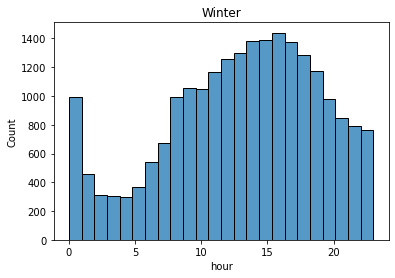

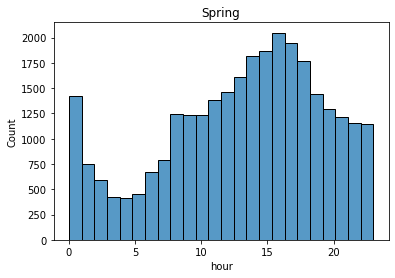

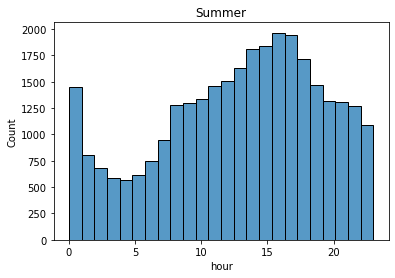

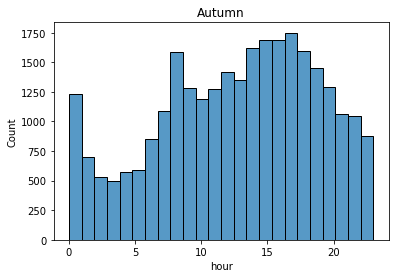

In [6]:
for season in nyc_crash["Season"].unique():
    temp = nyc_crash.loc[nyc_crash["Season"] == season]
    sns.histplot(x = 'hour', bins = 24, data = temp).set(title = season)
    plt.show()

In [7]:
nyc_crash["CONTRIBUTING FACTOR VEHICLE 1"] = nyc_crash["CONTRIBUTING FACTOR VEHICLE 1"].fillna('Other')
df = nyc_crash["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

def cfv1_100(row):
    if df[row['CONTRIBUTING FACTOR VEHICLE 1']] > 100:
        val = row['CONTRIBUTING FACTOR VEHICLE 1']
    else:
        val = "Other"
    return val

nyc_crash['cfv1_100'] = nyc_crash.apply(cfv1_100, axis = 1)

tab = pd.crosstab(nyc_crash["cfv1_100"], nyc_crash["num_injured"].sort_values(ascending=False))
tab

num_injured,0,1,2,3,4,5,6,7,8,9,10,11,14,16,17,18
cfv1_100,,,,,,,,,,,,,,,,
Aggressive Driving/Road Rage,537,219,54,21,6,5,1,2,0,0,1,0,0,0,0,0
Alcohol Involvement,1145,386,118,48,13,5,3,1,1,0,0,0,0,0,0,0
Backing Unsafely,2909,537,51,5,5,3,1,0,0,0,0,0,0,0,0,0
Brakes Defective,239,139,33,17,7,2,0,0,0,0,0,0,0,0,0,0
Driver Inattention/Distraction,17215,7280,1340,434,140,56,17,7,4,1,1,0,0,0,0,0
Driver Inexperience,1476,522,128,42,9,3,2,0,0,1,0,0,0,1,0,1
Driverless/Runaway Vehicle,91,23,3,0,0,0,0,0,0,0,0,0,0,0,0,0
Drugs (illegal),52,50,4,9,0,0,1,0,0,0,0,0,0,0,0,0
Failure to Keep Right,80,33,6,2,2,0,0,0,0,0,0,0,0,0,0,0


# How does borough effect injury ratio?

In [61]:
def injury(row):
    if row["num_injured"] >= 1:
        val = 1
    else:
        val = 0
    return val

nyc_crash['injury'] = nyc_crash.apply(injury, axis = 1)

tab = pd.crosstab(nyc_crash["injury"], nyc_crash["BOROUGH"])
tab

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
injury,,,,,
0,9317,16929,7764,13489,1872
1,4065,8225,3654,6067,792


<AxesSubplot:xlabel='injury', ylabel='BOROUGH'>

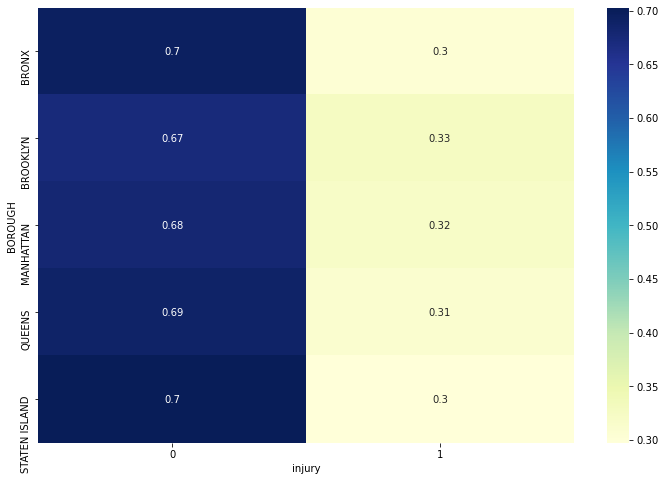

In [62]:
tab_perc = pd.crosstab(nyc_crash["BOROUGH"], nyc_crash["injury"], normalize = 'index')

plt.figure(figsize=(12,8)) 
sns.heatmap(tab_perc, annot=True, cmap="YlGnBu")

# A Chi-Squared regession on injuries by borough

In [103]:
import scipy.stats as stats
from scipy.stats import chisquare

tot_inj = 9317 + 16929 + 7764 + 13489 + 1872
tot_crash = 13382 + 25154 + 11418 + 19556 + 2864

bronx_crash_perc = 13382 / tot_crash
exp_bronx = round(tot_inj * bronx_crash_perc)

brook_crash_perc = 25154 / tot_crash
exp_brook = round(tot_inj * brook_crash_perc)

manhat_crash_perc = 11418 / tot_crash
exp_manhat = round(tot_inj * manhat_crash_perc)

queens_crash_perc = 19556 / tot_crash
exp_queens = round(tot_inj * queens_crash_perc)

staten_crash_perc = 2864 / tot_crash
exp_staten = round(tot_inj * staten_crash_perc)

chisquare([9317, 16929, 7764, 13489, 1872], f_exp=[exp_bronx, exp_brook, exp_manhat, exp_queens, exp_staten])

Power_divergenceResult(statistic=12.140178772618974, pvalue=0.01633874066119707)

# What's the number of vehicles per crash in each borough?

In [154]:
nyc_crash["VEHICLE TYPE CODE 5"] = nyc_crash["VEHICLE TYPE CODE 5"].fillna('NaN')
nyc_crash["VEHICLE TYPE CODE 4"] = nyc_crash["VEHICLE TYPE CODE 4"].fillna('NaN')
nyc_crash["VEHICLE TYPE CODE 3"] = nyc_crash["VEHICLE TYPE CODE 3"].fillna('NaN')
nyc_crash["VEHICLE TYPE CODE 2"] = nyc_crash["VEHICLE TYPE CODE 2"].fillna('NaN')
nyc_crash["VEHICLE TYPE CODE 1"] = nyc_crash["VEHICLE TYPE CODE 1"].fillna('NaN')

def number_of_vehicles(row):
    if nyc_crash['VEHICLE TYPE CODE 5'][row] != 'NaN':
        return 5
    elif nyc_crash['VEHICLE TYPE CODE 4'][row] != 'NaN':
        return 4
    elif nyc_crash['VEHICLE TYPE CODE 3'][row] != 'NaN':
        return 3
    elif nyc_crash['VEHICLE TYPE CODE 2'][row] != 'NaN':
        return 2
    else:
        return 1
    
for i in range(len(nyc_crash)):
    nyc_crash['num_vehicles'][i] = number_of_vehicles(i)

print(nyc_crash['VEHICLE TYPE CODE 2'][1] != 'NaN')

#nyc_crash['num_vehicles'] = nyc_crash.apply(number_of_vehicles)

tab = pd.crosstab(nyc_crash["BOROUGH"], nyc_crash["num_vehicles"])
tab
nyc_crash

<ipython-input-154-de3759e9ca9b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_crash['num_vehicles'][i] = number_of_vehicles(i)


False


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,num_vehicles
0,01/01/2021,7:10,NaN,NaN,40.824932,-73.824310,"(40.824932, -73.82431)",RANDALL AVENUE,NaN,NaN,...,NaN,NaN,NaN,4381298,Sedan,Sedan,NaN,NaN,NaN,2
1,01/01/2021,12:10,NaN,NaN,40.795310,-73.935920,"(40.79531, -73.93592)",EAST 115 STREET,NaN,NaN,...,NaN,NaN,NaN,4383118,Sedan,NaN,NaN,NaN,NaN,1
2,01/01/2021,6:00,NaN,NaN,NaN,NaN,NaN,WEST SHORE EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,4382769,Sedan,NaN,NaN,NaN,NaN,1
3,01/01/2021,8:18,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,4381189,Sedan,NaN,NaN,NaN,NaN,1
4,01/01/2021,2:45,NaN,NaN,40.742850,-73.830284,"(40.74285, -73.830284)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,4380754,Sedan,Sedan,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110477,12/31/2021,10:37,BROOKLYN,11213.0,40.678880,-73.935610,"(40.67888, -73.93561)",TROY AVENUE,HERKIMER STREET,NaN,...,NaN,NaN,NaN,4494052,Sedan,Sedan,NaN,NaN,NaN,2
110478,12/31/2021,11:15,QUEENS,11103.0,40.755394,-73.911964,"(40.755394, -73.911964)",49 STREET,NEWTOWN ROAD,NaN,...,NaN,NaN,NaN,4494156,Sedan,NaN,NaN,NaN,NaN,1
110479,12/31/2021,14:23,BRONX,10461.0,40.841390,-73.834680,"(40.84139, -73.83468)",MAYFLOWER AVENUE,WELLMAN AVENUE,NaN,...,NaN,NaN,NaN,4494228,Sedan,NaN,NaN,NaN,NaN,1
110480,12/31/2021,17:26,BROOKLYN,11212.0,40.669262,-73.913560,"(40.669262, -73.91356)",PITKIN AVENUE,BOYLAND STREET,NaN,...,NaN,NaN,NaN,4494776,E-Scooter,Sedan,NaN,NaN,NaN,2


In [150]:
for i in range(len(nyc_crash)-100000):
    if nyc_crash['VEHICLE TYPE CODE 5'][i] != 'NaN':
        print(5)
    elif nyc_crash['VEHICLE TYPE CODE 4'][i] != 'NaN':
        print(4)
    elif nyc_crash['VEHICLE TYPE CODE 3'][i] != 'NaN':
        print(3)
    elif nyc_crash['VEHICLE TYPE CODE 2'][i] != 'NaN':
        print(2)
    else:
        print(1)

2
1
1
1
2
2
1
2
1
2
1
1
1
1
1
2
2
2
1
3
3
3
2
2
2
2
1
2
1
2
2
1
5
2
2
1
2
2
2
1
1
2
3
1
5
2
1
1
2
2
1
2
2
1
1
3
2
2
2
2
1
2
1
1
2
2
2
2
1
2
2
1
2
2
1
2
2
1
2
3
2
1
1
2
3
2
2
1
2
2
2
1
2
1
2
3
1
2
3
5
2
2
4
4
2
2
2
2
2
1
2
1
1
1
1
3
2
1
2
2
4
1
1
1
2
3
2
2
3
1
2
1
4
1
3
2
2
5
3
1
1
2
2
2
2
1
1
1
1
2
4
1
2
1
4
2
2
2
1
1
1
1
2
2
1
3
1
1
3
1
1
2
2
3
1
2
2
2
1
5
1
2
1
1
1
2
1
5
1
1
1
2
1
2
1
2
2
2
2
2
2
2
1
1
2
2
2
2
2
1
2
1
3
2
2
1
2
2
2
2
2
1
2
2
1
2
1
1
2
1
2
1
2
2
1
2
2
1
1
2
1
2
2
1
2
2
1
1
2
1
1
1
2
2
1
2
1
1
1
1
1
1
5
2
1
2
2
2
3
2
2
1
2
1
1
1
1
1
1
2
1
1
2
1
2
2
2
1
2
2
1
1
3
5
2
2
2
2
1
2
1
2
2
2
2
2
1
2
1
2
1
2
1
1
2
2
1
1
2
1
2
2
2
2
2
1
2
2
1
2
2
2
3
3
2
2
2
1
1
2
4
2
2
2
2
1
1
3
2
2
1
1
2
2
2
2
3
3
2
2
2
2
3
1
3
2
3
2
2
1
1
3
2
3
1
1
2
2
1
1
1
4
2
2
2
1
1
1
2
2
2
1
3
2
2
1
2
2
1
1
2
2
2
1
1
1
1
1
2
2
1
2
2
2
2
2
5
2
2
1
1
1
1
1
1
2
3
1
2
2
5
2
3
3
2
2
2
1
4
1
4
1
2
2
2
2
2
1
1
2
2
1
2
1
2
2
2
2
3
3
2
2
1
1
1
2
1
2
2
2
1
2
2
2
2
2
2
2
2
2
1
1
2
3
2
5
1
1
3
1
2
1
2
2
1
1
2
1
1
2


1
1
2
2
1
2
2
2
2
2
1
2
2
1
1
1
2
2
1
3
2
2
2
1
2
2
2
2
1
2
1
3
2
1
1
1
3
2
1
1
2
2
2
2
2
2
1
1
2
3
2
2
2
2
2
3
4
2
2
1
3
2
1
2
2
2
1
1
2
4
2
1
2
1
2
1
2
2
2
3
1
1
2
5
2
2
1
2
1
2
2
2
2
3
2
1
1
2
1
2
3
1
3
2
1
2
2
2
2
2
2
2
1
2
2
2
2
1
2
1
2
2
1
2
2
2
2
2
2
2
1
4
1
2
2
2
1
2
2
3
2
1
1
2
4
1
1
2
1
2
2
1
2
3
2
2
2
2
2
2
2
2
2
2
2
1
2
2
1
1
2
2
1
2
2
1
1
2
2
2
2
1
3
2
2
2
2
2
2
4
2
3
1
2
2
2
2
1
2
2
2
2
2
4
1
2
1
2
2
2
1
1
1
1
2
2
2
3
2
2
2
2
2
2
2
1
1
1
3
2
1
2
1
2
2
1
4
1
2
2
2
3
2
1
2
1
1
2
1
2
1
2
3
1
2
2
1
2
2
1
4
3
2
1
1
2
2
1
2
2
3
2
2
1
2
1
2
2
2
3
2
2
1
1
1
2
1
1
2
1
3
2
2
2
2
3
2
2
2
1
1
1
2
1
3
2
2
1
1
2
1
4
3
1
1
3
1
2
2
2
1
1
3
2
2
2
4
1
2
3
5
2
1
4
2
2
1
2
2
1
1
1
2
1
2
2
2
2
2
1
2
1
1
1
1
1
2
2
1
2
2
2
1
2
2
2
2
1
1
3
1
1
1
2
2
2
2
1
1
3
1
1
2
3
2
2
2
2
4
2
2
3
2
2
1
1
1
1
3
2
1
2
2
2
2
2
1
2
1
2
2
1
2
2
1
2
1
2
2
2
2
1
1
2
2
2
2
2
1
2
1
1
1
2
2
2
2
1
1
2
1
2
1
1
2
3
2
1
2
1
2
2
1
2
1
2
2
2
2
2
2
2
1
1
5
1
2
2
2
2
1
2
2
2
2
2
2
3
2
4
4
3
1
1
1
3
2
1
1
2
2
1
2
2
1
2
3
1
2
1


1
1
2
2
2
1
2
1
1
2
1
3
3
1
2
2
2
2
2
3
2
1
2
1
1
2
2
2
2
2
2
1
2
2
1
2
2
3
2
2
2
2
2
2
2
2
2
1
2
1
2
3
2
2
2
1
4
3
3
2
3
2
2
1
2
1
1
2
1
2
2
2
2
1
2
2
1
2
1
2
2
2
2
2
1
1
1
2
3
1
2
2
2
2
3
1
2
1
2
2
1
2
1
2
1
2
2
1
3
2
1
2
1
3
2
2
3
2
3
1
2
1
2
2
2
2
1
2
2
1
2
2
1
1
2
2
2
1
1
1
2
3
1
2
2
2
1
1
3
1
2
2
1
2
3
2
2
2
2
2
2
1
4
4
1
2
2
2
1
2
2
1
1
2
1
1
1
2
2
1
1
2
1
2
1
1
2
2
2
1
1
1
1
2
2
2
3
2
1
1
1
2
1
2
2
2
2
2
2
1
1
2
2
2
1
2
4
1
4
2
1
1
1
2
2
3
2
2
4
3
1
1
2
2
1
2
2
2
1
1
2
1
1
1
2
2
2
2
1
3
2
2
2
2
1
2
1
5
2
2
1
1
2
3
1
5
2
1
2
2
4
1
1
2
2
1
1
1
1
2
2
1
2
2
2
2
2
3
2
2
1
1
1
1
1
2
2
3
1
1
2
2
2
2
2
1
2
1
2
2
2
2
